In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import TweetTokenizer
import string
from nltk import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from math import pi
from wordcloud import WordCloud
from PIL import Image
import re
from nltk.tokenize import word_tokenize

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV

In [4]:
from imblearn.over_sampling import SMOTE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix,\
                            classification_report, plot_roc_curve,\
                            mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC, SVC

import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
df_tweet = pd.read_csv('crowdflower-brands-and-product-emotions/data/judge_1377884607_tweet_product_company.csv')


In [6]:
df_tweet

tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
8716                      Ipad everywhere. #SXSW {link}   
8717  Wave, buzz... RT @mention We interrupt your re...   
8718  Google's Zeiger, a physician never reported po...   
8719  Some Verizon iPhone customers complained their...   
8720  �ϡ�����_��ʋ�΋�ҋ�������⋁_��������_���RT @mentio...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...                              ...   
8716                            iPad   
8717                             NaN   
8718                             NaN   
8719                             NaN   
8720                             NaN   

     is_there_an_emotion_directed_at_a_brand_or_product  
0                                      Negative emotion  
1                                      Positive emotion  
2                                      Positive emotion  
3                                      Negative emotion  
4                                      Positive emotion  
...                                                 ...  
8716                                   Positive emotion  
8717                 No emotion toward brand or product  
8718                 No emotion toward brand or product  
8719                 No emotion toward brand or product  
8720                 No emotion toward brand or product  

[8721 rows x 3 columns]

In [7]:
df_tweet.head(10)

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   
5  @teachntech00 New iPad Apps For #SpeechTherapy...   
6                                                NaN   
7  #SXSW is just starting, #CTIA is around the co...   
8  Beautifully smart and simple idea RT @madebyma...   
9  Counting down the days to #sxsw plus strong Ca...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   
5                             NaN   
6                             NaN   
7                         Android   
8              iPad or iPhone App   
9                           Apple   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion  
5                 No emotion toward brand or product  
6                 No emotion toward brand or product  
7                                   Positive emotion  
8                                   Positive emotion  
9                                   Positive emotion

In [8]:
df_tweet.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [9]:
df_tweet.columns = ['Tweet', 'Company/Product', 'Sentiment']

In [10]:
df_tweet.columns

Index(['Tweet', 'Company/Product', 'Sentiment'], dtype='object')

In [11]:
df_tweet.head()

Tweet     Company/Product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

          Sentiment  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion

In [12]:
df_tweet['Company/Product'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [13]:
df_tweet['Tweet']

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
8716                        Ipad everywhere. #SXSW {link}
8717    Wave, buzz... RT @mention We interrupt your re...
8718    Google's Zeiger, a physician never reported po...
8719    Some Verizon iPhone customers complained their...
8720    �ϡ�����_��ʋ�΋�ҋ�������⋁_��������_���RT @mentio...
Name: Tweet, Length: 8721, dtype: object

In [14]:
df_tweet['Tweet'].value_counts()

RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                                      5
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW                                      4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                                   4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW                                                   3
Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing what else they &amp; Foursquare have up their sleeves at #SXSW    2
                                                                                                                                                   ..
Anyone at  #sxsw want to sell their old iPad?                                                       

In [15]:
df_tweet["Sentiment"]


0                         Negative emotion
1                         Positive emotion
2                         Positive emotion
3                         Negative emotion
4                         Positive emotion
                       ...                
8716                      Positive emotion
8717    No emotion toward brand or product
8718    No emotion toward brand or product
8719    No emotion toward brand or product
8720    No emotion toward brand or product
Name: Sentiment, Length: 8721, dtype: object

In [16]:
df_tweet['Sentiment'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [17]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8720 non-null   object
 1   Company/Product  3169 non-null   object
 2   Sentiment        8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB


In [18]:
df_tweet[df_tweet['Tweet'].isna()]

Tweet Company/Product                           Sentiment
6   NaN             NaN  No emotion toward brand or product

In [19]:
df_tweet = df_tweet[df_tweet['Tweet'].isna() == False]
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8720 non-null   object
 1   Company/Product  3169 non-null   object
 2   Sentiment        8720 non-null   object
dtypes: object(3)
memory usage: 272.5+ KB


In [20]:
df_tweet[df_tweet['Company/Product'].isna()].head()


Tweet Company/Product  \
5   @teachntech00 New iPad Apps For #SpeechTherapy...             NaN   
16  Holler Gram for iPad on the iTunes App Store -...             NaN   
32  Attn: All  #SXSW frineds, @mention Register fo...             NaN   
33      Anyone at  #sxsw want to sell their old iPad?             NaN   
34  Anyone at  #SXSW who bought the new iPad want ...             NaN   

                             Sentiment  
5   No emotion toward brand or product  
16  No emotion toward brand or product  
32  No emotion toward brand or product  
33  No emotion toward brand or product  
34  No emotion toward brand or product

In [21]:

df_tweet['Company/Product'].fillna('Unknown', inplace=True)


In [22]:
df_tweet.isna().sum()

Tweet              0
Company/Product    0
Sentiment          0
dtype: int64

In [23]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8720 non-null   object
 1   Company/Product  8720 non-null   object
 2   Sentiment        8720 non-null   object
dtypes: object(3)
memory usage: 272.5+ KB


In [24]:
df_tweet['Sentiment'].value_counts()

No emotion toward brand or product    5155
Positive emotion                      2869
Negative emotion                       545
I can't tell                           151
Name: Sentiment, dtype: int64

In [25]:
sentiment_dict = {'Positive emotion': 'Positive', 'Negative emotion': 'Negative', 
                'No emotion toward brand or product': 'Neutral', 
                "I can't tell": 'Unknown'}
df_tweet['Sentiment'] = df_tweet['Sentiment'].map(sentiment_dict)
df_tweet.head()

Tweet     Company/Product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

  Sentiment  
0  Negative  
1  Positive  
2  Positive  
3  Negative  
4  Positive

In [26]:
df_tweet['Sentiment'].value_counts()

Neutral     5155
Positive    2869
Negative     545
Unknown      151
Name: Sentiment, dtype: int64

In [27]:
df_tweet[df_tweet['Sentiment']=='Unknown']

Tweet Company/Product  \
88    Thanks to @mention for publishing the news of ...         Unknown   
100   ���@mention &quot;Apple has opened a pop-up st...         Unknown   
228   Just what America needs. RT @mention Google to...         Unknown   
330   The queue at the Apple Store in Austin is FOUR...         Unknown   
357   Hope it's better than wave RT @mention Buzz is...         Unknown   
...                                                 ...             ...   
8650  It's funny watching a room full of people hold...         Unknown   
8662  @mention yeah, we have @mention , Google has n...         Unknown   
8667  @mention Yes, the Google presentation was not ...         Unknown   
8687  &quot;Do you know what Apple is really good at...         Unknown   
8695  How much you want to bet Apple is disproportio...           Apple   

     Sentiment  
88     Unknown  
100    Unknown  
228    Unknown  
330    Unknown  
357    Unknown  
...        ...  
8650   Unknown  
8662   Unknown  
8667   Unknown  
8687   Unknown  
8695   Unknown  

[151 rows x 3 columns]

In [28]:
df_tweet = df_tweet[df_tweet['Sentiment']!='Unknown']
df_tweet["Sentiment"].value_counts()

Neutral     5155
Positive    2869
Negative     545
Name: Sentiment, dtype: int64

In [29]:
df_tweet[df_tweet.duplicated()]

Tweet     Company/Product  \
457      Before It Even Begins, Apple Wins #SXSW {link}               Apple   
752   Google to Launch Major New Social Network Call...             Unknown   
2138  Marissa Mayer: Google Will Connect the Digital...             Unknown   
2437  Counting down the days to #sxsw plus strong Ca...               Apple   
3759  Really enjoying the changes in Gowalla 3.0 for...         Android App   
3771  #SXSW is just starting, #CTIA is around the co...             Android   
4669  Oh. My. God. The #SXSW app for iPad is pure, u...  iPad or iPhone App   
5107  RT @mention ��� GO BEYOND BORDERS! ��_ {link} ...             Unknown   
5110  RT @mention ��� Happy Woman's Day! Make love, ...             Unknown   
5650  RT @mention Google to Launch Major New Social ...             Unknown   
5651  RT @mention Google to Launch Major New Social ...             Unknown   
5652  RT @mention Google to Launch Major New Social ...             Unknown   
5653  RT @mention Google to Launch Major New Social ...             Unknown   
5654  RT @mention Google to Launch Major New Social ...             Unknown   
6065  RT @mention Marissa Mayer: Google Will Connect...              Google   
6066  RT @mention Marissa Mayer: Google Will Connect...             Unknown   
6067  RT @mention Marissa Mayer: Google Will Connect...              Google   
6068  RT @mention Marissa Mayer: Google Will Connect...             Unknown   
6069  RT @mention Marissa Mayer: Google Will Connect...             Unknown   
6315  RT @mention RT @mention Google to Launch Major...             Unknown   
8146  I just noticed DST is coming this weekend. How...              iPhone   
8394  Need to buy an iPad2 while I'm in Austin at #s...                iPad   

     Sentiment  
457   Positive  
752    Neutral  
2138   Neutral  
2437  Positive  
3759  Positive  
3771  Positive  
4669  Positive  
5107   Neutral  
5110   Neutral  
5650   Neutral  
5651   Neutral  
5652   Neutral  
5653   Neutral  
5654   Neutral  
6065  Positive  
6066   Neutral  
6067  Positive  
6068   Neutral  
6069   Neutral  
6315   Neutral  
8146  Negative  
8394  Positive

In [30]:
len(df_tweet[df_tweet.duplicated()])

22

In [31]:
df_tweet.drop_duplicates(keep='first', inplace =True)
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8547 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8547 non-null   object
 1   Company/Product  8547 non-null   object
 2   Sentiment        8547 non-null   object
dtypes: object(3)
memory usage: 267.1+ KB


In [32]:
def countplot(df_tweet, columns, hue=None, rotation=90):
    df_filtered = df_tweet[df_tweet[columns] != "Unknown"]
    if hue:
        df_filtered = df_filtered[df_filtered[hue] != "Unknown"]
    fig, ax = plt.subplots(figsize=(12,8))
    sns.countplot(data= df_filtered, x=columns, hue=hue, order = df_filtered[columns].value_counts().index)
    ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=rotation, fontsize= 20)
    ax.set_xlabel(xlabel = columns, fontsize = 20)
    ax.tick_params(axis='y', which='major')
    ax.set_ylabel(ylabel = "Number of Tweets", fontsize = 20)
    ax.set_title(f"Number of Tweets per {columns}", fontsize = 30)
    plt.show()

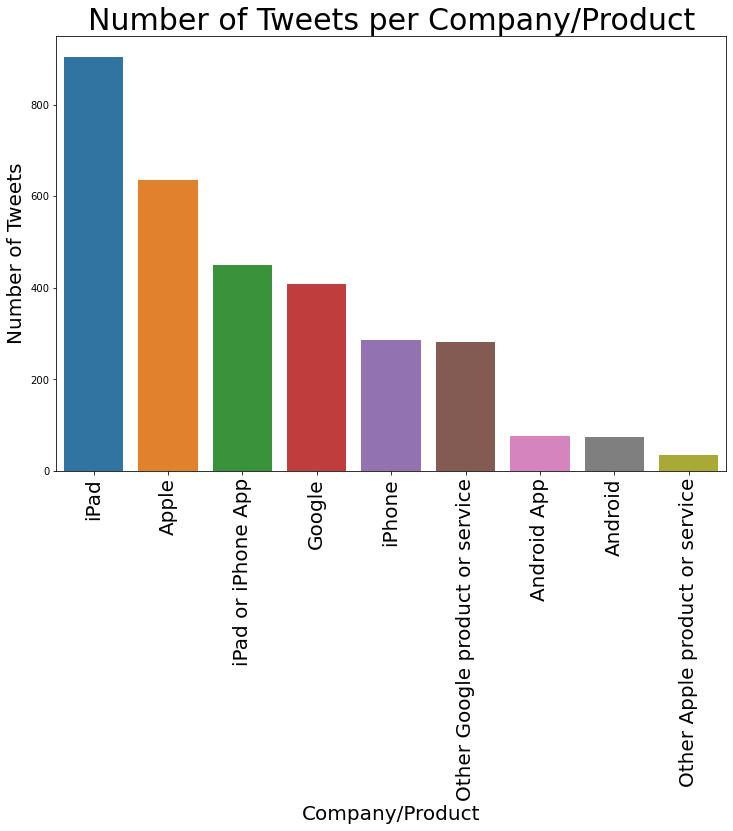

In [33]:
countplot( df_tweet, 'Company/Product')

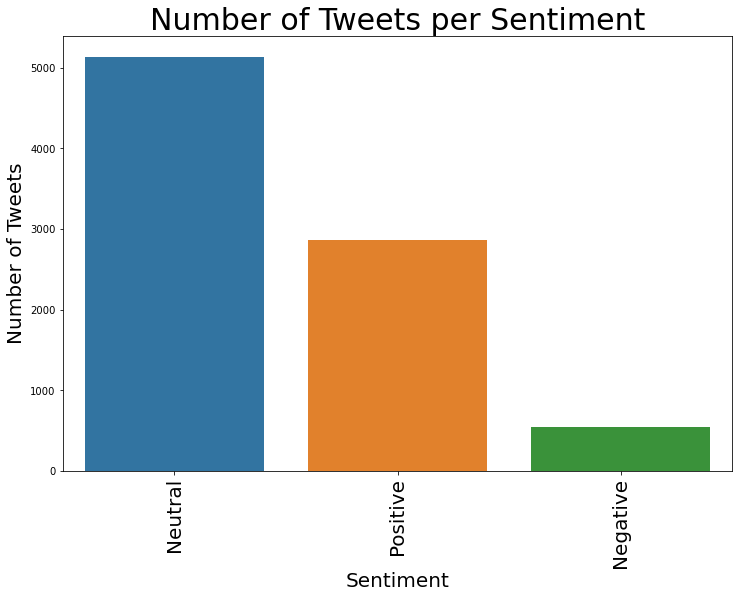

In [34]:
countplot (df_tweet, 'Sentiment')

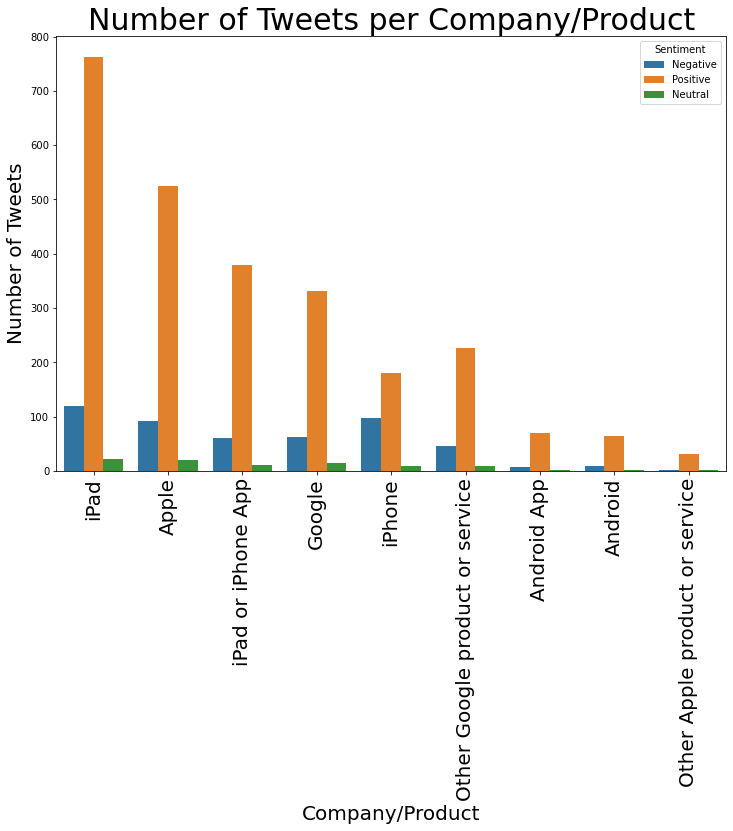

In [35]:
countplot(df_tweet, 'Company/Product', hue='Sentiment')

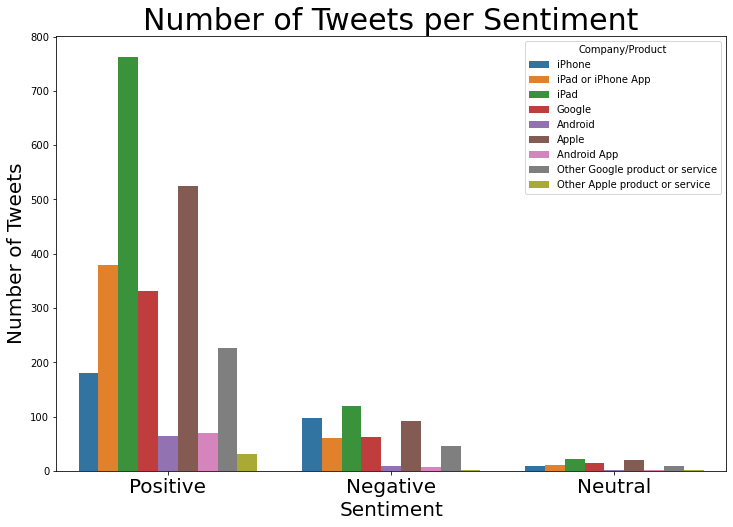

In [36]:
countplot(df_tweet, 'Sentiment', hue='Company/Product', rotation=None)


In [37]:
df_positive = df_tweet[df_tweet['Sentiment']=='Positive']
df_positive['Sentiment'].value_counts()


Positive    2861
Name: Sentiment, dtype: int64

In [38]:
pos_corpus = df_positive['Tweet'].to_list()
pos_corpus[:5]

["@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 "@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",
 '#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB']

## Tokenization

In [39]:
def tokenize_tweets(corpus, preserve_case=False, strip_handles=True):
    tokenizer = TweetTokenizer(preserve_case=preserve_case, 
                               strip_handles=strip_handles)
    tokens = tokenizer.tokenize(','.join(corpus))
    return tokens
    

In [40]:
tokens_pos = tokenize_tweets(pos_corpus)

In [41]:
#displaying 10 most common tokens
freq = FreqDist(tokens_pos)
freq.most_common(10)

[(',', 3941),
 ('#sxsw', 2874),
 ('.', 2175),
 ('the', 1551),
 ('!', 1197),
 ('link', 1167),
 ('{', 1164),
 ('}', 1164),
 ('to', 1119),
 ('at', 999)]

## Lemmatizaton

In [42]:
def process_tokens(tokens):
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove punctuation
    lemmatized_tokens_no_punct = [token for token in lemmatized_tokens if token not in string.punctuation]
    
    # Remove English stop words
    stop_words = set(stopwords.words('english'))
    processed_tokens = [token for token in lemmatized_tokens_no_punct if token not in stop_words]
    
    return processed_tokens

In [43]:
tokens_pos_lemm = process_tokens(tokens_pos)

In [44]:
freq = FreqDist(tokens_pos_lemm)
freq.most_common(50)

[('#sxsw', 2874),
 ('link', 1170),
 ('ipad', 984),
 ('rt', 927),
 ('apple', 700),
 ('google', 585),
 ('2', 580),
 ('store', 535),
 ('�', 453),
 ('iphone', 450),
 ('app', 373),
 ('new', 352),
 ('austin', 243),
 ('...', 215),
 ('get', 174),
 ('launch', 166),
 ('#apple', 157),
 ('android', 152),
 ('party', 149),
 ('pop-up', 146),
 ('sxsw', 142),
 ('line', 138),
 ('time', 131),
 ('great', 128),
 ('day', 123),
 ('via', 122),
 ('social', 120),
 ('win', 118),
 ('#ipad2', 118),
 ('free', 116),
 ('cool', 116),
 ("i'm", 114),
 ('like', 110),
 ('map', 109),
 ('today', 109),
 ('one', 109),
 ('circle', 106),
 ('ha', 103),
 ('go', 103),
 ('come', 101),
 ('w', 99),
 ('wa', 97),
 ('#sxswi', 94),
 ('love', 91),
 ('network', 91),
 ('awesome', 90),
 ('good', 88),
 ('mobile', 87),
 ('opening', 86),
 ('downtown', 85)]

In [45]:
def updated_process_tokens(tokens):
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove punctuation
    lemmatized_tokens_no_punct = [token for token in lemmatized_tokens if token not in string.punctuation]
    
    # Remove English stop words
    stop_words = set(stopwords.words('english'))
    additional_stop_words = ['#sxsw', 'sxsw', '#sxswi', 'link', 'rt']
    stop_words.update(additional_stop_words)
    processed_tokens_updated = [token for token in lemmatized_tokens_no_punct if token not in stop_words]
    
    return processed_tokens_updated

In [46]:
update_tokens_pos_lemm = updated_process_tokens(tokens_pos)

In [47]:
def most_frequent_tokens(tokens, n=50):
    # Calculate the frequency distribution of the tokens
    freq_dist = nltk.FreqDist(tokens)
    
    # Return the n most common tokens
    return freq_dist.most_common(n)

In [48]:
most_frequent_tokens(update_tokens_pos_lemm)

[('ipad', 984),
 ('apple', 700),
 ('google', 585),
 ('2', 580),
 ('store', 535),
 ('�', 453),
 ('iphone', 450),
 ('app', 373),
 ('new', 352),
 ('austin', 243),
 ('...', 215),
 ('get', 174),
 ('launch', 166),
 ('#apple', 157),
 ('android', 152),
 ('party', 149),
 ('pop-up', 146),
 ('line', 138),
 ('time', 131),
 ('great', 128),
 ('day', 123),
 ('via', 122),
 ('social', 120),
 ('win', 118),
 ('#ipad2', 118),
 ('free', 116),
 ('cool', 116),
 ("i'm", 114),
 ('like', 110),
 ('map', 109),
 ('today', 109),
 ('one', 109),
 ('circle', 106),
 ('ha', 103),
 ('go', 103),
 ('come', 101),
 ('w', 99),
 ('wa', 97),
 ('love', 91),
 ('network', 91),
 ('awesome', 90),
 ('good', 88),
 ('mobile', 87),
 ('opening', 86),
 ('downtown', 85),
 ('temporary', 84),
 ('#ipad', 83),
 ('people', 82),
 ('#iphone', 79),
 ('got', 79)]

In [49]:
#defining a function for wordcloud generation
def create_wordcloud(tokens_list, colormap= 'Greens', title='title'):
    mask = np.array(Image.open('images/twitter_logo_2.png'))
    # Join the tokens into a single string
    text = ' '.join(tokens_list)
    
    # Generate a word cloud image
    wordcloud = WordCloud(width=500, height=300, background_color='black', mask=mask, colormap=colormap).generate(text)
    
    # Display the generated image:
    plt.figure(figsize=(12, 15), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

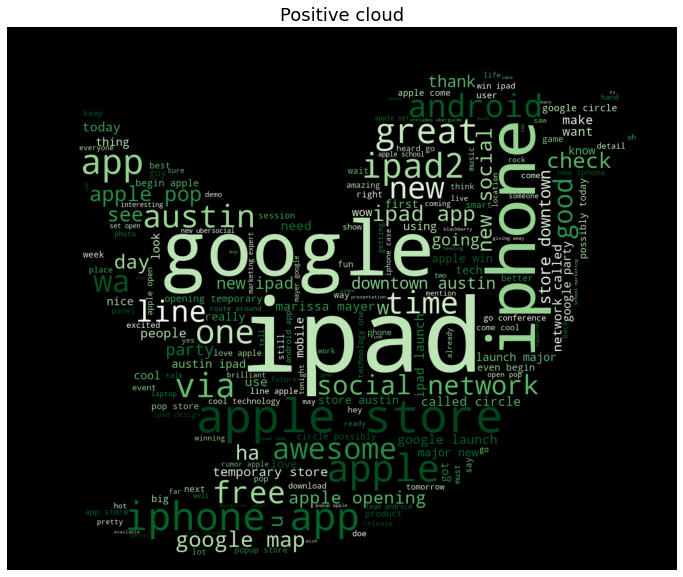

In [50]:
cloud_pos= create_wordcloud(update_tokens_pos_lemm, title = 'Positive cloud')

In [51]:
def second_updated_process_tokens(tokens):
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove punctuation
    lemmatized_tokens_no_punct = [token for token in lemmatized_tokens if token not in string.punctuation]
    
    # Remove English stop words
    stop_words = set(stopwords.words('english'))
    additional_stop_words = ['#sxsw', 'sxsw', '#sxswi', 'link', 'rt', 'ipad', 'apple', 'google', 'iphone', '#apple', '#google', '#ipad', '#iphone', 'android']
    stop_words.update(additional_stop_words)
    processed_tokens_updated_second = [token for token in lemmatized_tokens_no_punct if token not in stop_words]
    
    return processed_tokens_updated_second

In [52]:
second_update_tokens_pos_lemm = second_updated_process_tokens(tokens_pos)

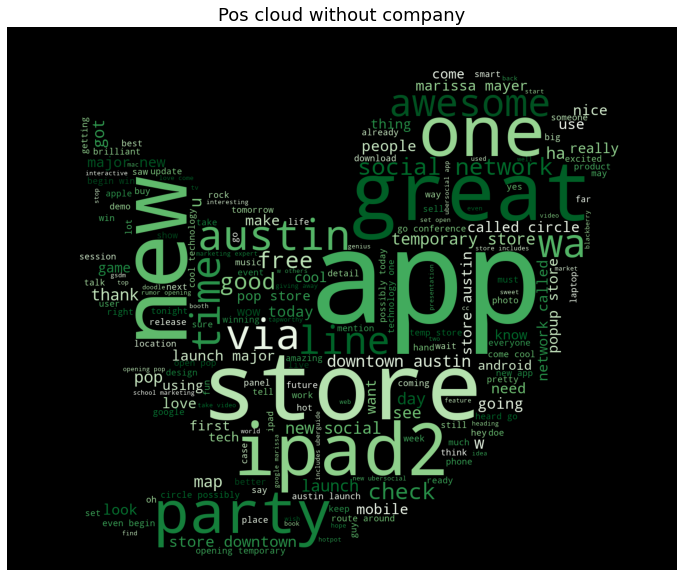

In [53]:
cloud_pos_wo_company= create_wordcloud(second_update_tokens_pos_lemm, title= 'Pos cloud without company')


### Negative Sentiment Tweets

In [54]:
df_neg = df_tweet[df_tweet['Sentiment']=='Negative']
df_neg['Sentiment'].value_counts()

Negative    544
Name: Sentiment, dtype: int64

In [55]:
neg_corpus= df_neg['Tweet'].to_list()
neg_corpus

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 'I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone',
 '@mention  - False Alarm: Google Circles Not Coming Now���and Probably Not Ever? - {link} #Google #Circles #Social #SXSW',
 'Again? RT @mention Line at the Apple store is insane.. #sxsw',
 'attending @mention iPad design headaches #sxsw {link}',
 'Boooo! RT @mention Flipboard is developing an iPhone version, not Android, says @mention #sxsw',
 "What !?!? @mention  #SXSW does not provide iPhone chargers?!?  I've changed my mind about going next year!",
 "Know that &quot;dataviz&quot; translates to &quot;satanic&quot; on an iPhone. I'm just sayin'. #sxsw",
 'Seriously #sxsw? Did you do any testing on the mobile apps? Constant iPad crashes ca

In [56]:
neg_tokens = tokenize_tweets(neg_corpus)


In [57]:
neg_freq = FreqDist(neg_tokens)
freq.most_common(10)

[('#sxsw', 2874),
 ('link', 1170),
 ('ipad', 984),
 ('rt', 927),
 ('apple', 700),
 ('google', 585),
 ('2', 580),
 ('store', 535),
 ('�', 453),
 ('iphone', 450)]

In [58]:
tokens_neg_lemm= process_tokens(neg_tokens)

In [59]:
updated_tokens_neg_lemm= updated_process_tokens(neg_tokens)

In [60]:
most_frequent_tokens(updated_tokens_neg_lemm)

[('ipad', 176),
 ('iphone', 140),
 ('google', 132),
 ('apple', 96),
 ('2', 80),
 ('�', 74),
 ('app', 58),
 ('store', 46),
 ('like', 43),
 ('...', 41),
 ('new', 41),
 ('need', 35),
 ('circle', 29),
 ('people', 29),
 ('ha', 29),
 ('design', 27),
 ('social', 27),
 ('get', 25),
 ('wa', 24),
 ('apps', 24),
 ('austin', 23),
 ('think', 23),
 ('time', 22),
 ('launch', 21),
 ('one', 21),
 ('look', 21),
 ('line', 20),
 ('say', 20),
 ('day', 20),
 ('today', 20),
 ('android', 19),
 ('would', 19),
 ('phone', 18),
 ('network', 17),
 ('headache', 16),
 ("i've", 16),
 ("i'm", 16),
 ('#ipad', 16),
 ('long', 16),
 ('product', 16),
 ('user', 15),
 ('news', 15),
 ('thing', 15),
 ('see', 15),
 ('much', 15),
 ('company', 15),
 ('america', 15),
 ('battery', 14),
 ('money', 14),
 ('#apple', 14)]

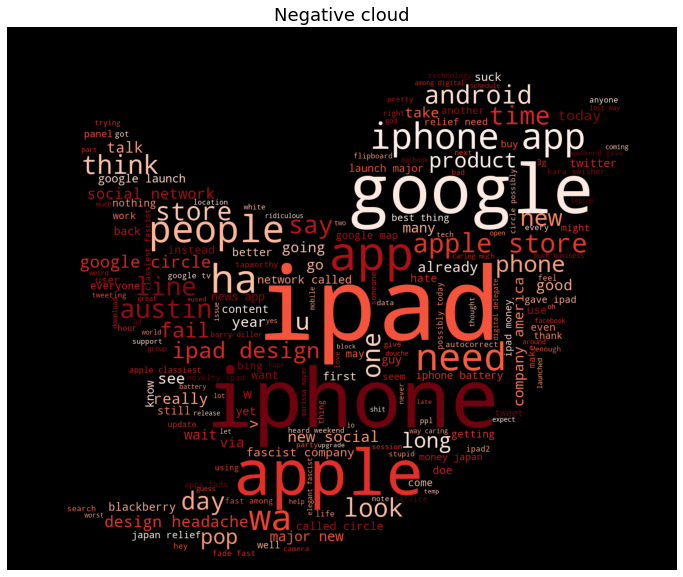

In [61]:
cloud_neg= create_wordcloud(updated_tokens_neg_lemm, colormap='Reds', title='Negative cloud')


In [62]:
second_update_tokens_neg_lemm = second_updated_process_tokens(neg_tokens)

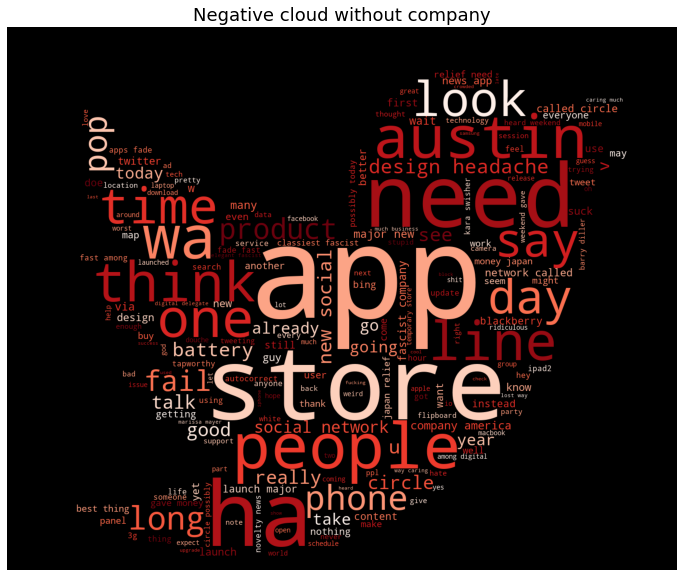

In [63]:
cloud_neg_wo_company= create_wordcloud(second_update_tokens_neg_lemm, colormap='Reds', title='Negative cloud without company')

## Feature Engineering Company Column 


In [64]:
df_tweet['Company/Product'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Unknown',
       'Android', 'Apple', 'Android App',
       'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [65]:
company_dict={'iPhone': 'Apple', 'iPad or iPhone App': 'Apple', 'iPad': 'Apple', 
            'Google': 'Google', 'Unknown': 'Unknown',
            'Android': 'Google', 'Apple': 'Apple', 'Android App': 'Google',
            'Other Google product or service': 'Google',
            'Other Apple product or service': 'Apple'}
df_tweet['Company'] = df_tweet['Company/Product'].map(company_dict)
df_tweet['Company'].unique()

array(['Apple', 'Google', 'Unknown'], dtype=object)

In [66]:
df_apple = df_tweet[df_tweet['Company']=='Apple']
corpus_apple = df_apple['Tweet'].to_list()

In [67]:
tokens_apple = tokenize_tweets(corpus_apple)

In [68]:
tokens_apple_lemm = process_tokens(tokens_apple)

In [69]:
tokens_apple_ls = updated_process_tokens(tokens_apple_lemm)

In [70]:
most_frequent_tokens(tokens_apple_ls)

[('ipad', 1086),
 ('apple', 760),
 ('2', 591),
 ('store', 548),
 ('iphone', 544),
 ('�', 344),
 ('app', 330),
 ('austin', 228),
 ('new', 222),
 ('...', 187),
 ('#apple', 159),
 ('pop-up', 151),
 ('get', 147),
 ('line', 143),
 ('#ipad2', 113),
 ('like', 110),
 ('one', 109),
 ("i'm", 107),
 ('ha', 102),
 ('win', 100),
 ('go', 99),
 ('#ipad', 96),
 ('via', 96),
 ('cool', 94),
 ('day', 93),
 ('wa', 90),
 ('time', 87),
 ('opening', 84),
 ('temporary', 84),
 ('downtown', 82),
 ('come', 78),
 ('apps', 78),
 ('launch', 77),
 ('free', 76),
 ('love', 76),
 ('great', 75),
 ('#iphone', 73),
 ('even', 72),
 ('open', 71),
 ('need', 69),
 ('awesome', 69),
 ('popup', 67),
 ('people', 65),
 ('good', 63),
 ('got', 63),
 ('want', 60),
 ('going', 59),
 ('first', 58),
 ('u', 58),
 ('pop', 57)]

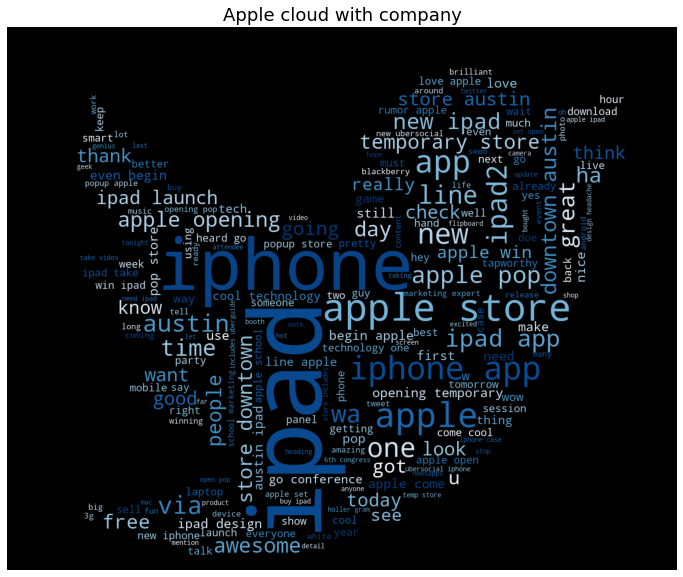

In [71]:
apple_cloud_w_company=create_wordcloud(tokens_apple_ls, colormap='Blues', title='Apple cloud with company')


In [72]:
second_tokens_apple_ls = second_updated_process_tokens(tokens_apple_lemm)

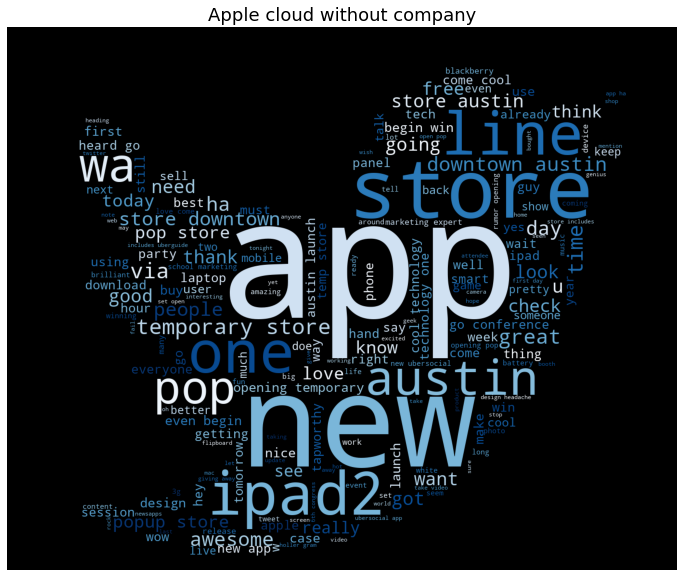

In [73]:
apple_cloud_wo_company = create_wordcloud(second_tokens_apple_ls, colormap='Blues', title= 'Apple cloud without company')

In [74]:
df_apple_sentiment = pd.DataFrame(df_apple['Sentiment'].value_counts(normalize=True)).reset_index()
df_apple_sentiment.columns=['Sentiment', 'Percentage']
display(df_apple_sentiment)
df_apple_sentiment.sort_values('Percentage', ascending=True, inplace=True)

Sentiment  Percentage
0  Positive    0.812635
1  Negative    0.160537
2   Neutral    0.026828

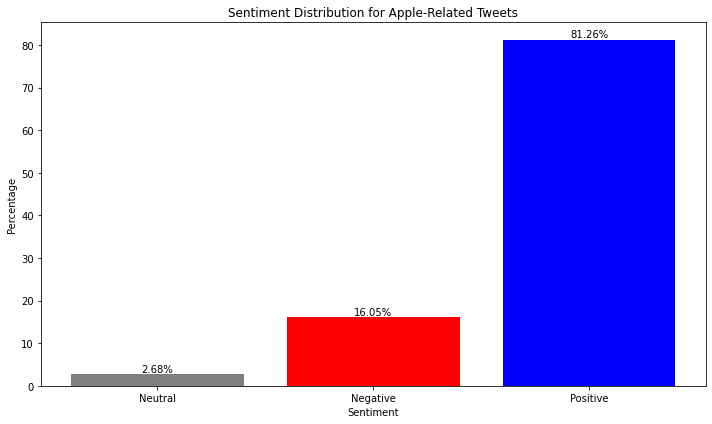

In [75]:
categories = ['Neutral', 'Negative', 'Positive']
percentages = [2.68, 16.05, 81.26]

# Creating bar plot
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(categories, percentages, color=['grey', 'red', 'blue', 'green'])

# Adding title and labels
plt.title('Sentiment Distribution for Apple-Related Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

# Adding percentage labels above bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f'{percentage}%', ha='center')

# Show plot
plt.tight_layout()
plt.show()

In [76]:
def generate_product_wordcloud(company, sentiment, colormap='Greens', title= 'title'):
    company_df = df_tweet[df_tweet['Company']==company]
    final_df = company_df[company_df['Sentiment']==sentiment]
    product_lst = list(final_df['Company/Product'].unique())
    wordclouds={}
    for product in product_lst:
            token_df = final_df[final_df['Company/Product']==product]
            corpus = token_df['Tweet'].to_list()
            #tokenize tweets
            tokens_company = tokenize_tweets(corpus)
            #lemmatize tweets
            tokens_company_lemm = process_tokens(tokens_company)
            #remove stop words & punctuation using the same stop words list
            tokens_company_ls = second_updated_process_tokens(tokens_company_lemm) 
            wordclouds[product] = create_wordcloud(tokens_company_ls, 
                                     colormap=colormap, title=title)
            
    return wordclouds

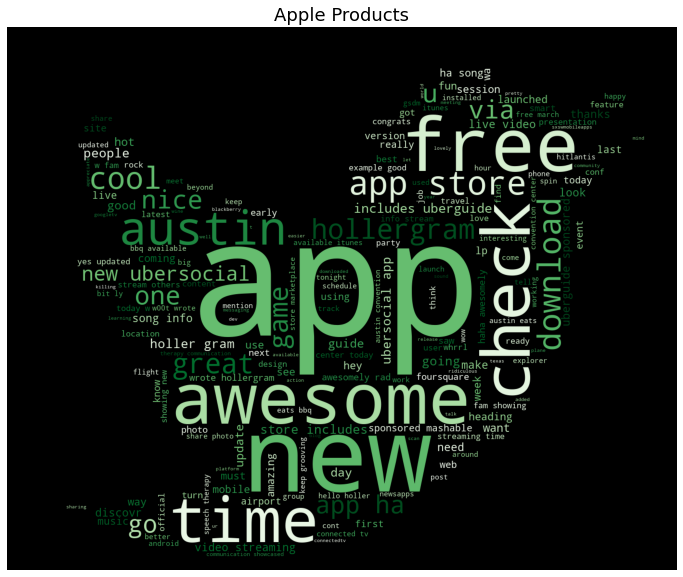

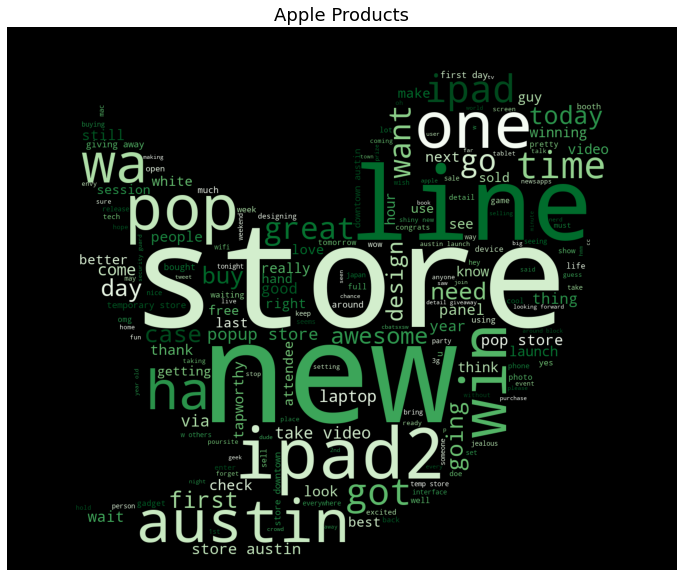

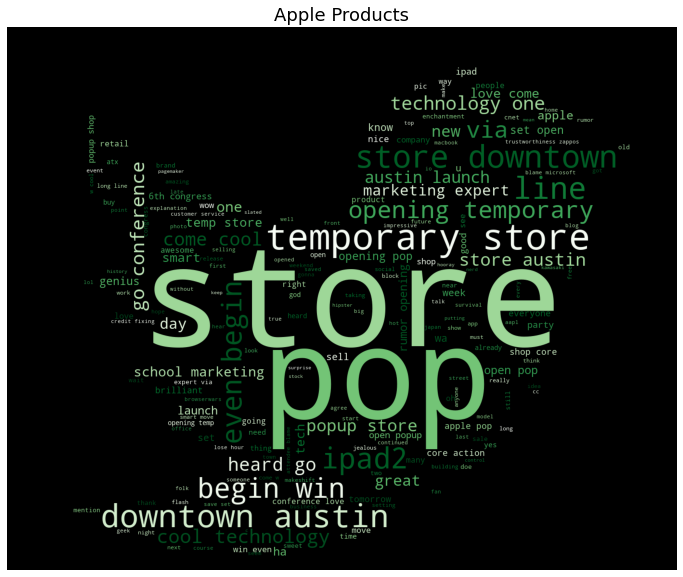

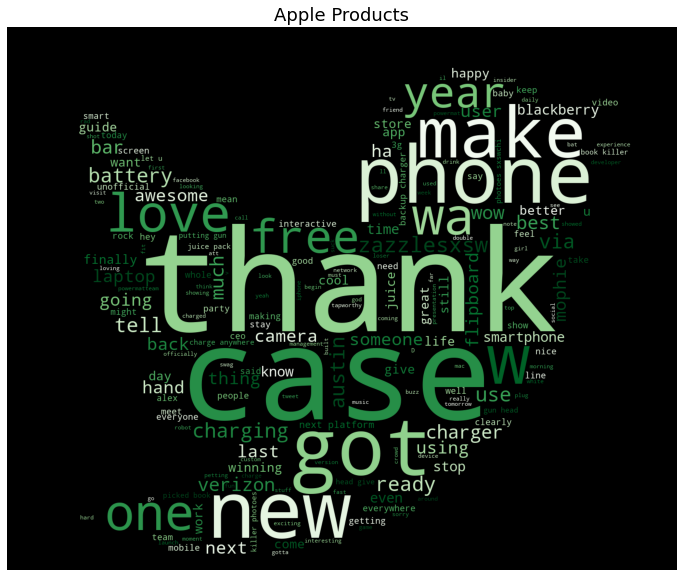

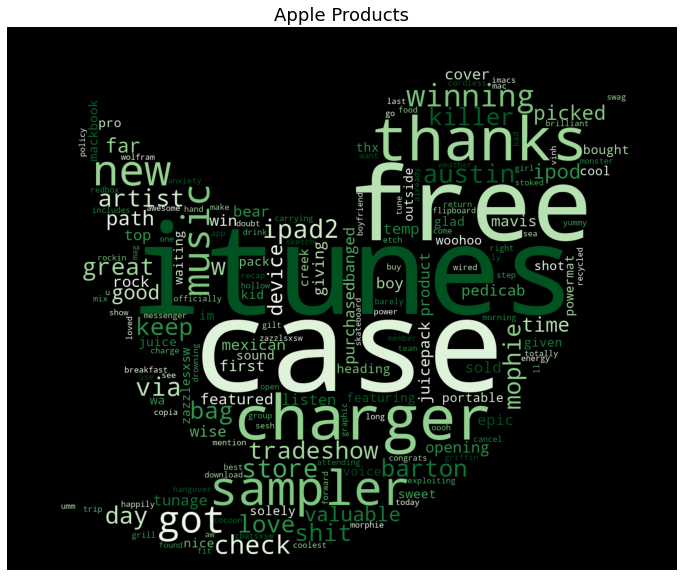

In [77]:
wordcloud_apple_pos = generate_product_wordcloud('Apple', 'Positive', title="Apple Products") 
                                                                
                                                                

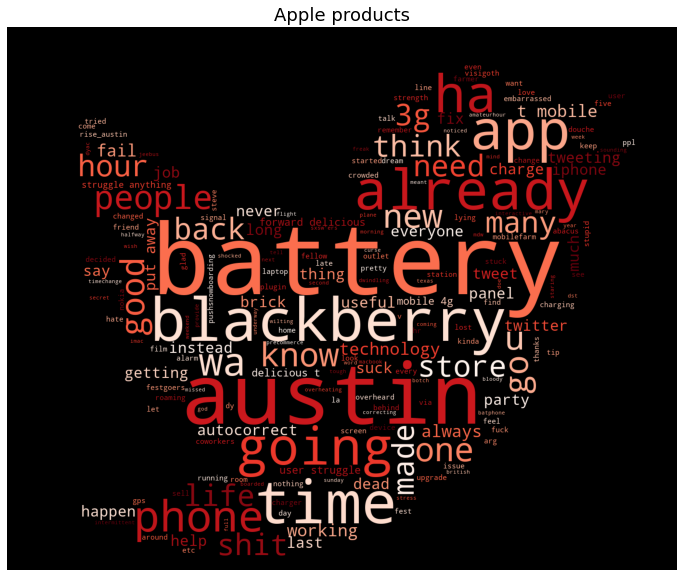

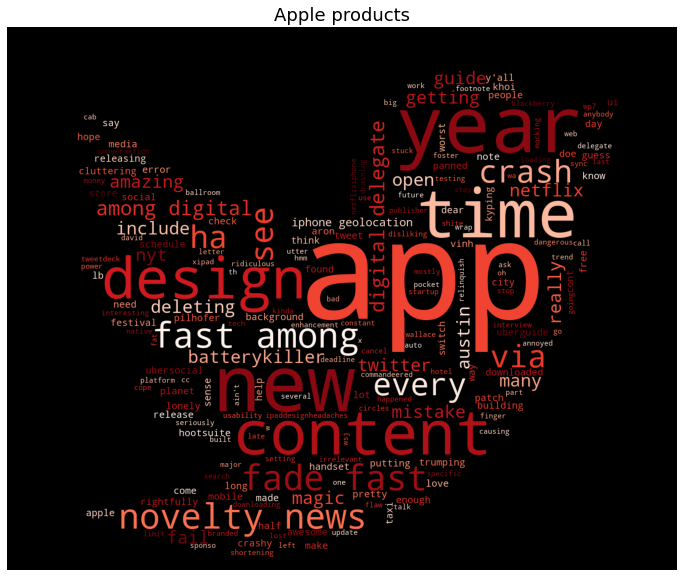

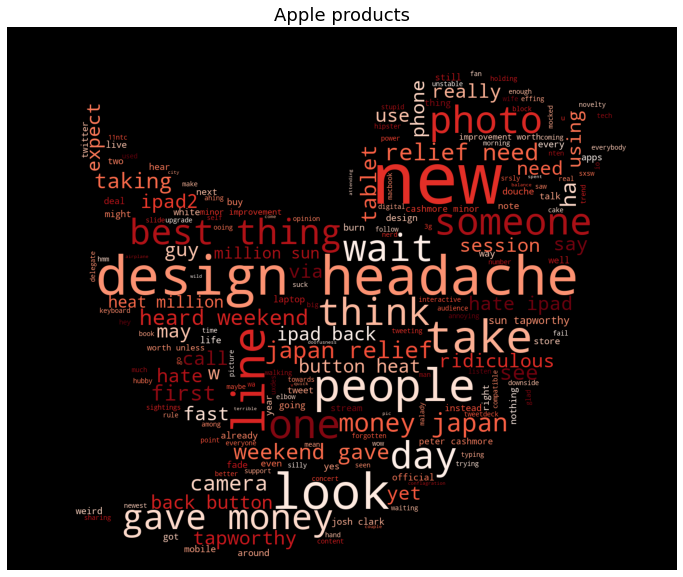

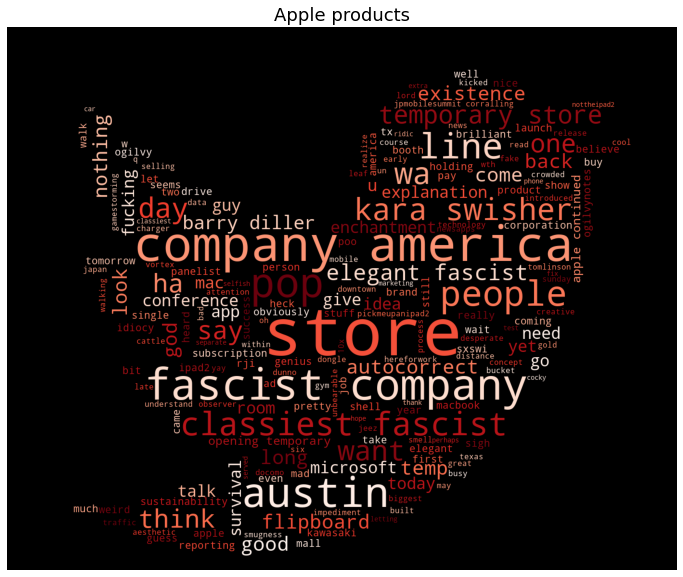

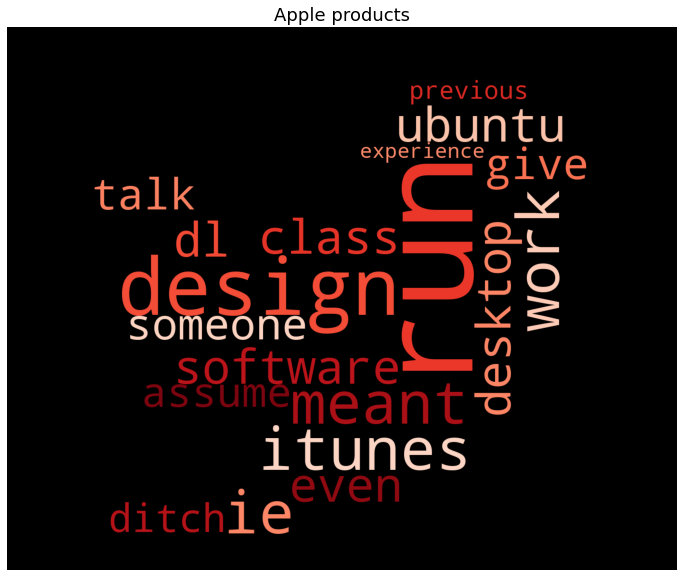

In [78]:
wordcloud_apple_neg = generate_product_wordcloud('Apple','Negative',colormap='Reds', title='Apple products')


In [79]:
df_google = df_tweet[df_tweet['Company']=='Google']
corpus_google = df_google['Tweet'].to_list()

In [80]:
tokens_google = tokenize_tweets(corpus_google)
#lemmatize tweets
tokens_google_lemm = process_tokens(tokens_google)
#remove stop words & punctuation using the same stop words list
tokens_google_ls = updated_process_tokens(tokens_google_lemm)

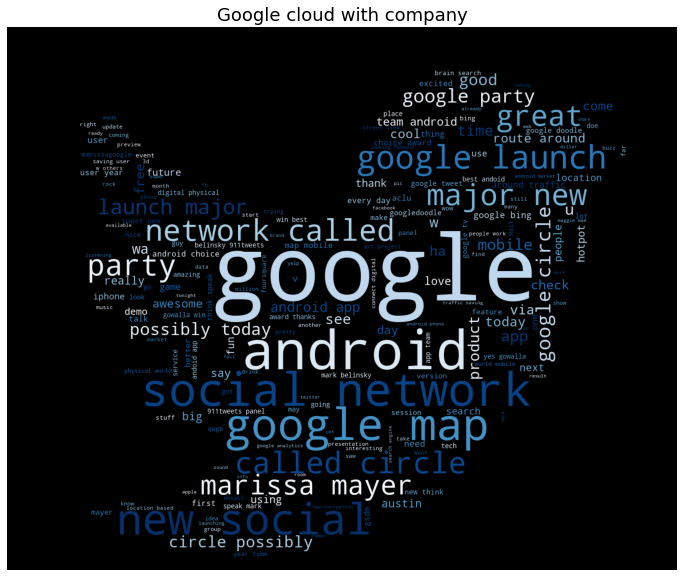

In [81]:
google_cloud_w_company=create_wordcloud(tokens_google_ls, colormap='Blues', title= 'Google cloud with company')

In [82]:
second_tokens_google_ls = second_updated_process_tokens(tokens_google_lemm)

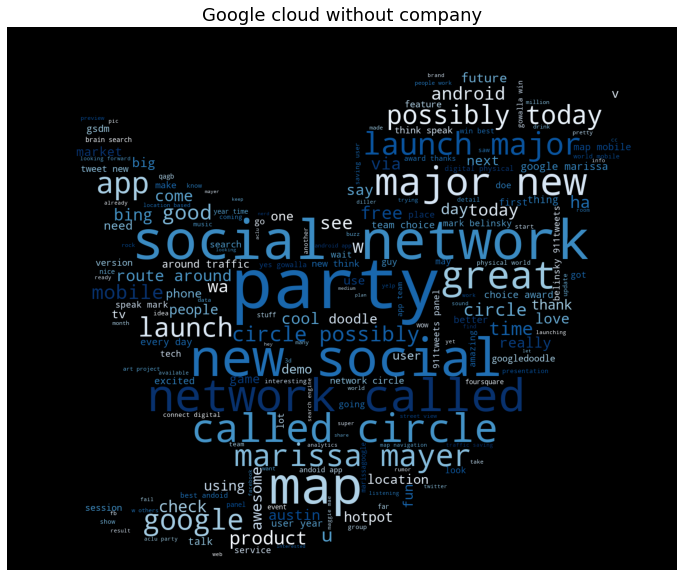

In [83]:
google_cloud_wo_company = create_wordcloud(second_tokens_google_ls, colormap='Blues', title= 'Google cloud without company')

In [84]:
df_google_sentiment = pd.DataFrame(df_google['Sentiment'].value_counts(normalize=True)).reset_index()
df_google_sentiment.columns=['Sentiment', 'Percentage']
display(df_google_sentiment)
df_google_sentiment.sort_values('Percentage', ascending=True, inplace=True)

Sentiment  Percentage
0  Positive    0.822619
1  Negative    0.147619
2   Neutral    0.029762

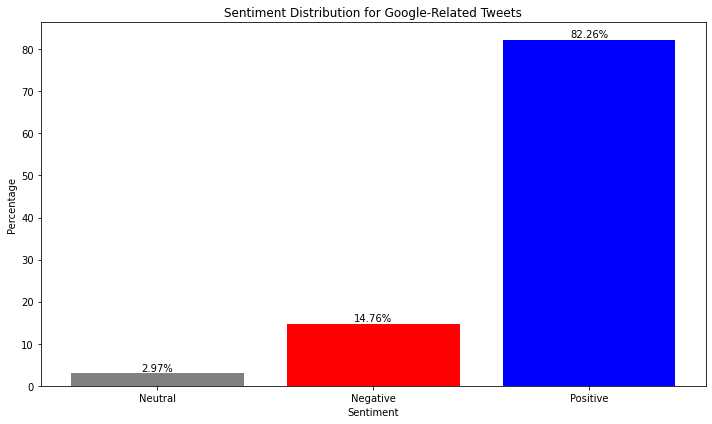

In [85]:
categories = ['Neutral', 'Negative', 'Positive']
percentages = [2.97, 14.76, 82.26]

# Creating bar plot
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(categories, percentages, color=['grey', 'red', 'blue', 'green'])

# Adding title and labels
plt.title('Sentiment Distribution for Google-Related Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

# Adding percentage labels above bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f'{percentage}%', ha='center')

# Show plot
plt.tight_layout()
plt.show()

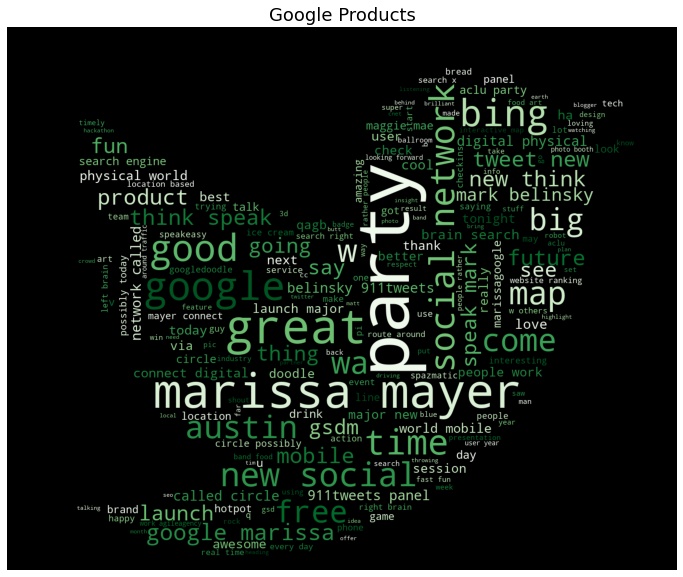

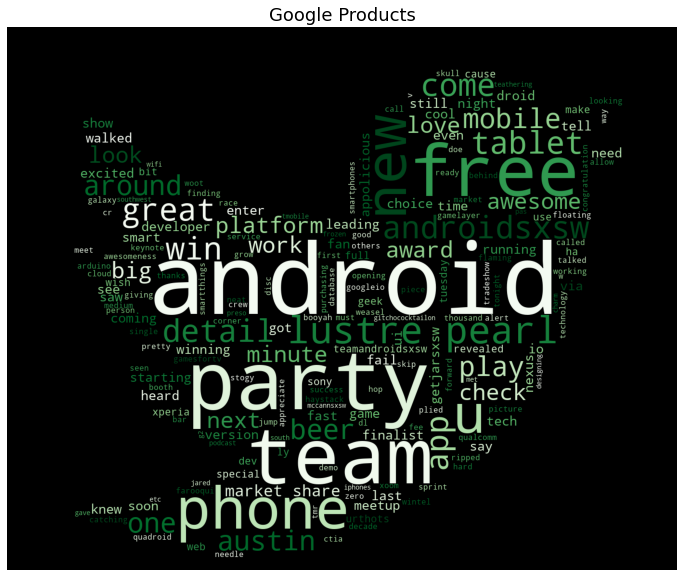

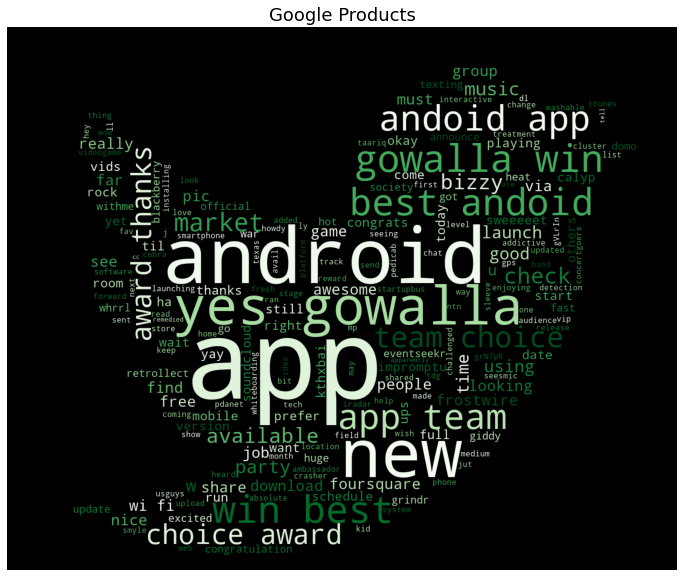

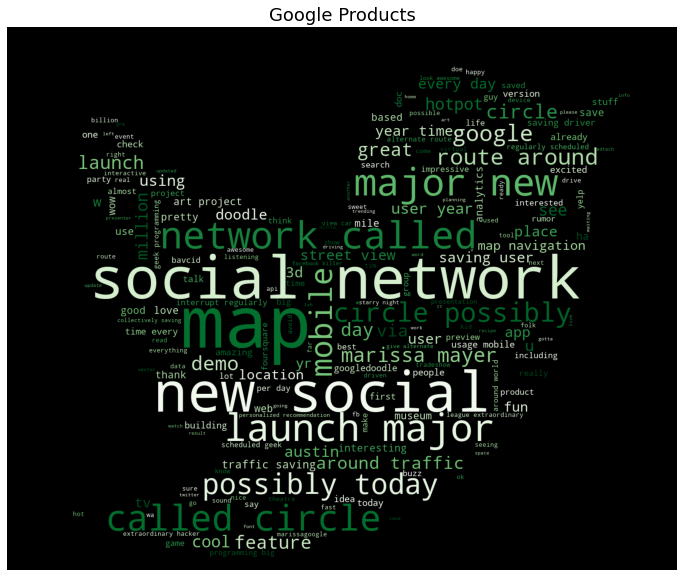

In [86]:
wordcloud_google_pos = generate_product_wordcloud('Google', 'Positive', title= 'Google Products') 
                                                                  

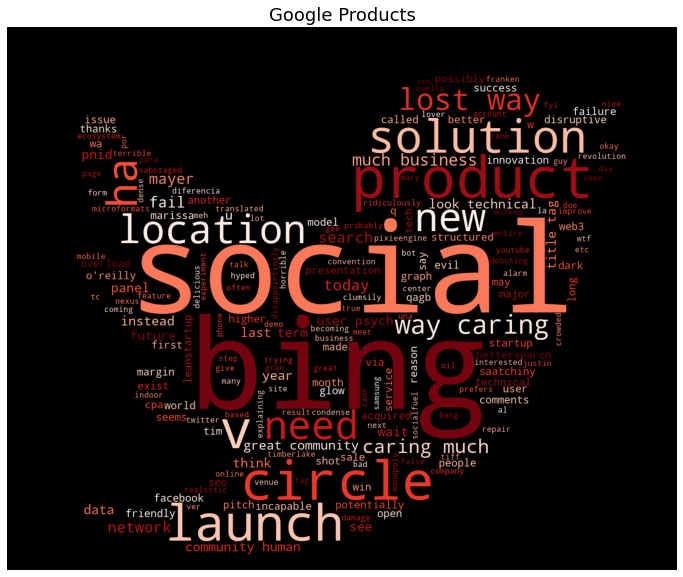

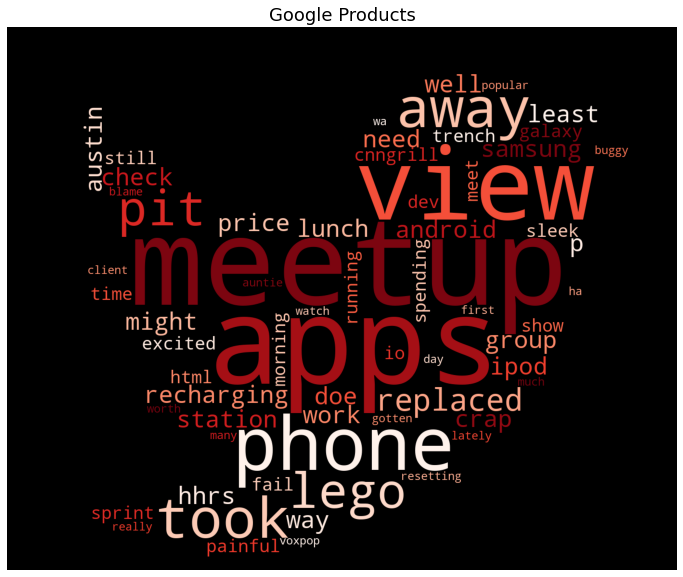

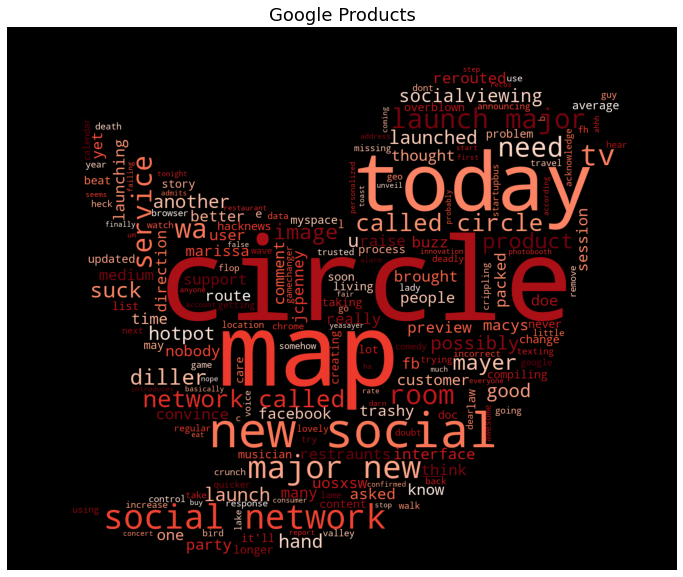

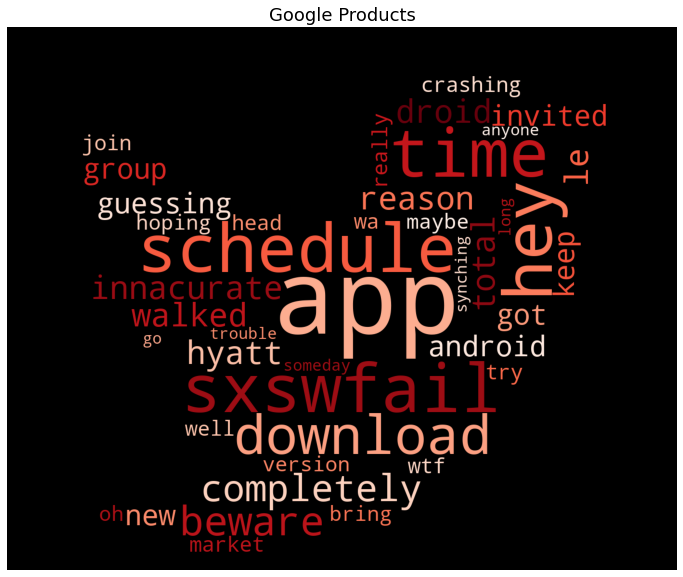

In [87]:
wordcloud_google_neg = generate_product_wordcloud('Google', 'Negative',colormap='Reds', title='Google Products')

### Conclusions

Referring back to the questions we set out to answer, here were the observations based on our EDA on the tweets from the SXSW Conference:

**1. How is Apple perceived as a company during the SXSW Conference, and how does this compare to Google as one of their main competitors?**

- During the SXSW Conference, 81.1% of all tweets related to Apple were positive compared to Google's 82%.
- During the SXSW Conference, 16.1% of all tweets related to Apple were positive compared to Google's 14.9%

This suggests that both companies and their products and services are perceived mostly in a positive way. 

**2. How are Apple and Google's products and announcements perceived during the SXSW Conference? Are there specific pain points within the products that Apple should address?**

Apple - Positives:
- Tweets about Apple suggest that the temporary pop-up store announcement in downtown Austin has been received very well by Apple fans and generated a lot of excitement for the brand. 
- One of the most frequently talked about products was the iPad 2 which seems to have been launched during SXSW and sold in the Austin temporary pop-up store. Based on the tweets, Apple's launch of this product definitely generated a lot of buzz.
- Samplers and free products/services were frequently mentioned as well.

Apple - Negatives:
- The iPhone's battery is frequently discussed in negative tweets.
- Design of the iPad was referred to as a "design headache."
- There are several tweets mentioning Kara Swisher and references to Apple as a "fascist company."
- Several apps are referred to as "battery killer" and the design of the News app seems to have not been received positively.

Google - Positives:
- Google's party in Lustre Pearl generated a lot of buzz.
- Marissa Mayer is mentioned extensively, so her talk was positively received.
- Google's new social network project "Circle" seems to have caused a lot of excitement.
- Microsoft's Bing search engine is mentioned in a negative way.

Google - Negatives:
- Some users seem to be having issues with Android OS based on words such as "buggy", "replaced", and "painful."
- Samsung is mentioned in tweets with relation to Android suggesting some users may prefer it to Google's products.
- Users of Meetup are having problems with Android.

## Modeling

In [90]:
from nltk.corpus import stopwords

# Define the set of English stop words
stop_words = set(stopwords.words('english'))

# Define additional stop words specific to the context
additional_stop_words = ['#sxsw', 'sxsw', '#sxswi', 'link', 'rt', 'ipad', 'apple', 'google', 'iphone', '#apple', '#google', '#ipad', '#iphone', 'android']

# Update the original set of stop words with the additional ones
stop_lst=stop_words.update(additional_stop_words)

In [89]:
#removing neutral tweets for binary classification
data = df_tweet[df_tweet['Sentiment']!='Neutral']
#verifying that neutral tweets have been removed
data['Sentiment'].unique()

array(['Negative', 'Positive'], dtype=object)

In [91]:
sentiment_dict = {'Negative': 0, 'Positive': 1}
data['Sentiment'] = data['Sentiment'].map(sentiment_dict)

In [92]:
X=data['Tweet']
y=data['Sentiment']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)


In [94]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True)

In [102]:
vectorizer= TfidfVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_lst)
vec_X_train = vectorizer.fit_transform(X_train)
vec_X_test  = vectorizer.transform(X_test)

In [103]:
len(y_train)

2553

In [104]:
count = np.bincount(y_train)
print(count[0]) # Minority class
print(count[1]) # Majority class

424
2129


In [105]:
# Automatically assign the weights for each class from the training data

# We must give the minority class the higher weight, to balance the scale against the number of occurences
# We do this by calculating the percentages of each class in the data 

w0 = count[1]/len(y_train) # Assigning majority percentage
w1 = count[0]/len(y_train) # Assigning minority percentage

print(w0) # Adjusted weight for the minority class
print(w1) # Adjusted weight for the majority class

0.8339208773991382
0.16607912260086174


In [106]:
# Previous original class distribution
print(y_train.value_counts()) 

# Fit SMOTE to training data
vec_X_train_resampled, y_train_resampled = SMOTE().fit_resample(vec_X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

1    2129
0     424
Name: Sentiment, dtype: int64


1    2129
0    2129
Name: Sentiment, dtype: int64


In [126]:
import pandas as pd
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, plot_confusion_matrix, plot_roc_curve

def model_results(model, X_test, y_test):
    # This function returns various metrics for our models that we run

    preds = model.predict(X_test)
    
    # A visual representation of a confusion Matrix
    plot_confusion_matrix(model, X_test, y_test);    
    plt.grid(False)
    
    # Prints the MAE & RMSE of a model
    print('Mean Absolute Error:', mean_absolute_error(y_test, preds)) 
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, preds)))

    # Plots the ROC Curve & Returns the AUC score
    plot_roc_curve(model, X_test, y_test);  

Mean Absolute Error: 0.12206572769953052
Root Mean Squared Error: 0.3493790601904048


Precision    Recall  F1-score     Support
0              0.605263  0.383333  0.469388  120.000000
1              0.904639  0.959016  0.931034  732.000000
accuracy       0.877934  0.877934  0.877934    0.877934
weighted avg   0.862474  0.877934  0.866014  852.000000
macro avg      0.754951  0.671175  0.700211  852.000000

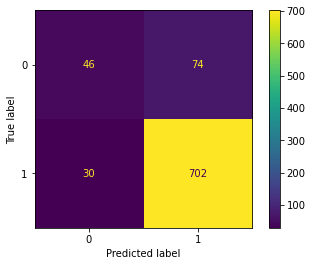

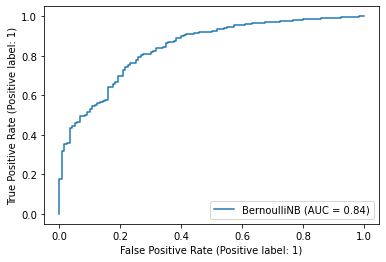

In [127]:
BNBmodel = BernoulliNB()
BNBmodel.fit(vec_X_train_resampled, y_train_resampled)

# Displays results of the model
model_results(BNBmodel, vec_X_test, y_test)

# Returns Classification Report
get_classification_report(y_test, BNBmodel.predict(vec_X_test))

Mean Absolute Error: 0.11971830985915492
Root Mean Squared Error: 0.34600333793065485
              Precision    Recall  F1-score     Support
0              0.615385  0.400000  0.484848  120.000000
1              0.906977  0.959016  0.932271  732.000000
accuracy       0.880282  0.880282  0.880282    0.880282
weighted avg   0.865907  0.880282  0.869254  852.000000
macro avg      0.761181  0.679508  0.708560  852.000000


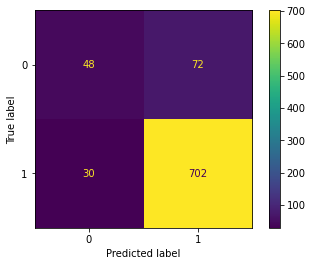

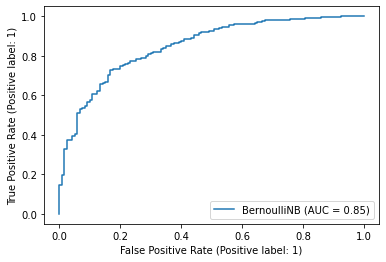

In [128]:


# Define the parameter grid to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Smoothing parameter
    'binarize': [None, 0.0, 0.1, 0.5]  # Binarization threshold
}

# Initialize Bernoulli Naive Bayes model
BNBmodel = BernoulliNB()

# Initialize GridSearchCV with the specified parameter grid and model
grid_search = GridSearchCV(BNBmodel, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(vec_X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize a new Bernoulli Naive Bayes model with the best parameters
best_BNBmodel = BernoulliNB(alpha=best_params['alpha'], binarize=best_params['binarize'])

# Fit the model on the training data
best_BNBmodel.fit(vec_X_train_resampled, y_train_resampled)

# Evaluate the model
model_results(best_BNBmodel, vec_X_test, y_test)

# Print the classification report
print(get_classification_report(y_test, best_BNBmodel.predict(vec_X_test)))


Mean Absolute Error: 0.15140845070422534
Root Mean Squared Error: 0.38911238826876915


Precision    Recall  F1-score     Support
0              0.470968  0.608333  0.530909  120.000000
1              0.932568  0.887978  0.909727  732.000000
accuracy       0.848592  0.848592  0.848592    0.848592
weighted avg   0.867554  0.848592  0.856372  852.000000
macro avg      0.701768  0.748156  0.720318  852.000000

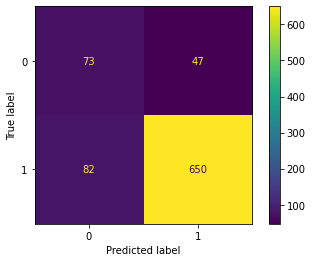

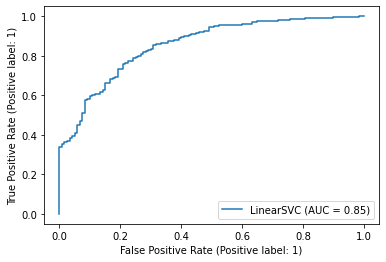

In [129]:
SVCmodel = LinearSVC(class_weight={0: w0, 1: w1})
SVCmodel.fit(vec_X_train, y_train)

# Displays results of the model
model_results(SVCmodel, vec_X_test, y_test)

# Returns Classification Report
get_classification_report(y_test, SVCmodel.predict(vec_X_test))

Mean Absolute Error: 0.11032863849765258
Root Mean Squared Error: 0.3321575507160007
              Precision    Recall  F1-score     Support
0              0.675676  0.416667  0.515464  120.000000
1              0.910026  0.967213  0.937748  732.000000
accuracy       0.889671  0.889671  0.889671    0.889671
weighted avg   0.877019  0.889671  0.878272  852.000000
macro avg      0.792851  0.691940  0.726606  852.000000


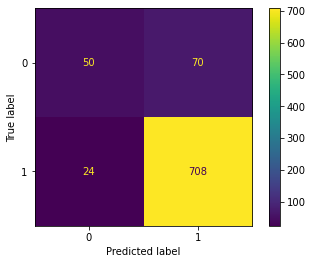

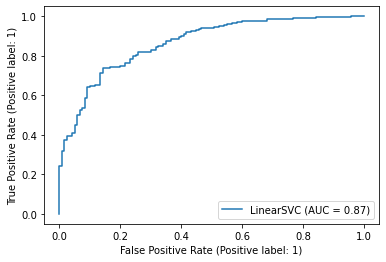

In [130]:
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'class_weight': [{0: w0, 1: w1}, 'balanced', None]  # Class weights
}

# Initialize Linear SVC model
SVCmodel = LinearSVC()

# Initialize GridSearchCV with the specified parameter grid and model
grid_search = GridSearchCV(SVCmodel, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(vec_X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize a new Linear SVC model with the best parameters
best_SVCmodel = LinearSVC(C=best_params['C'], class_weight=best_params['class_weight'])

# Fit the model on the training data
best_SVCmodel.fit(vec_X_train, y_train)

# Evaluate the model
model_results(best_SVCmodel, vec_X_test, y_test)

# Print the classification report
print(get_classification_report(y_test, best_SVCmodel.predict(vec_X_test)))

Mean Absolute Error: 0.23826291079812206
Root Mean Squared Error: 0.4881218196292008


Precision    Recall  F1-score     Support
0              0.334661  0.700000  0.452830  120.000000
1              0.940100  0.771858  0.847712  732.000000
accuracy       0.761737  0.761737  0.761737    0.761737
weighted avg   0.854827  0.761737  0.792095  852.000000
macro avg      0.637381  0.735929  0.650271  852.000000

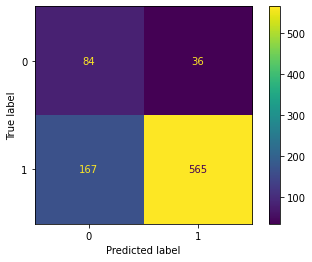

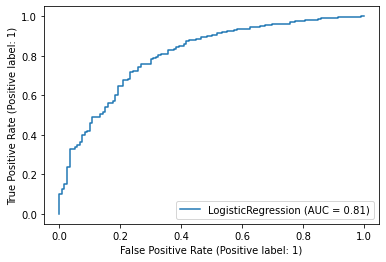

In [131]:
LRmodel = LogisticRegression(class_weight={0: w0, 1: w1})
LRmodel.fit(vec_X_train, y_train)

# Displays results of the model
model_results(LRmodel, vec_X_test, y_test)

# Returns Classification Report
get_classification_report(y_test, LRmodel.predict(vec_X_test))

Mean Absolute Error: 0.11267605633802817
Root Mean Squared Error: 0.33567254331867563
              Precision    Recall  F1-score     Support
0              0.671429  0.391667  0.494737  120.000000
1              0.906650  0.968579  0.936592  732.000000
accuracy       0.887324  0.887324  0.887324    0.887324
macro avg      0.789039  0.680123  0.715664  852.000000
weighted avg   0.873520  0.887324  0.874359  852.000000


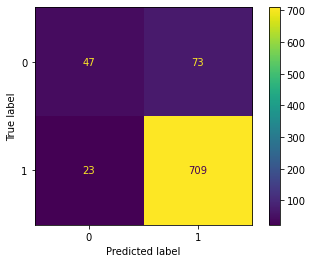

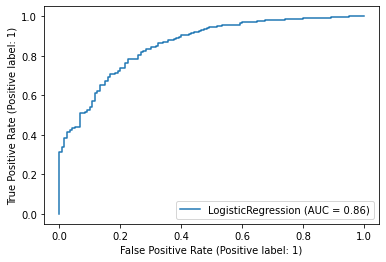

In [115]:
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'class_weight': [{0: w0, 1: w1}, 'balanced', None],  # Class weights
    'solver': ['liblinear', 'lbfgs']  # Solver for optimization
}

# Initialize Logistic Regression model
LRmodel = LogisticRegression()

# Initialize GridSearchCV with the specified parameter grid and model
grid_search = GridSearchCV(LRmodel, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(vec_X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize a new Logistic Regression model with the best parameters
best_LRmodel = LogisticRegression(C=best_params['C'], class_weight=best_params['class_weight'], solver=best_params['solver'])

# Fit the model on the training data
best_LRmodel.fit(vec_X_train, y_train)

# Evaluate the model
model_results(best_LRmodel, vec_X_test, y_test)

# Print the classification report
print(get_classification_report(y_test, best_LRmodel.predict(vec_X_test)))

Mean Absolute Error: 0.11619718309859155
Root Mean Squared Error: 0.3408770791628436
              Precision    Recall  F1-score     Support
0              0.818182  0.225000  0.352941  120.000000
1              0.886447  0.991803  0.936170  732.000000
accuracy       0.883803  0.883803  0.883803    0.883803
macro avg      0.852314  0.608402  0.644556  852.000000
weighted avg   0.876832  0.883803  0.854025  852.000000


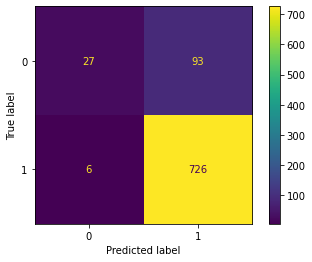

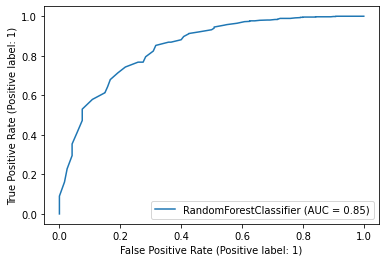

In [116]:
# Define hyperparameters
n_estimators = 100
max_depth = None
min_samples_split = 2
min_samples_leaf = 1

# Initialize Random Forest model with specified hyperparameters
RFmodel = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf)

# Fit the model on the training data
RFmodel.fit(vec_X_train, y_train)

# Evaluate the model
model_results(RFmodel, vec_X_test, y_test)

# Print the classification report
print(get_classification_report(y_test, RFmodel.predict(vec_X_test)))

Mean Absolute Error: 0.11384976525821597
Root Mean Squared Error: 0.33741630852437465
              Precision    Recall  F1-score    Support
0              0.848485  0.233333  0.366013  120.00000
1              0.887668  0.993169  0.937460  732.00000
accuracy       0.886150  0.886150  0.886150    0.88615
macro avg      0.868076  0.613251  0.651736  852.00000
weighted avg   0.882149  0.886150  0.856974  852.00000


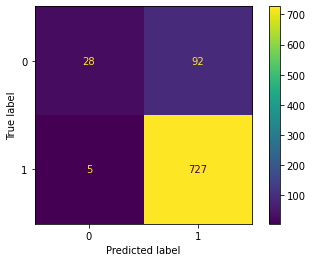

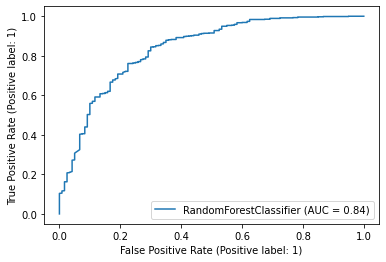

In [118]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize Random Forest model
RFmodel = RandomForestClassifier()

# Initialize GridSearchCV with the specified parameter grid and model
grid_search = GridSearchCV(RFmodel, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(vec_X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize a new Random Forest model with the best parameters
best_RFmodel = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                      max_depth=best_params['max_depth'],
                                      min_samples_split=best_params['min_samples_split'],
                                      min_samples_leaf=best_params['min_samples_leaf'])

# Fit the model on the training data
best_RFmodel.fit(vec_X_train, y_train)

# Evaluate the model
model_results(best_RFmodel, vec_X_test, y_test)

# Print the classification report
print(get_classification_report(y_test, best_RFmodel.predict(vec_X_test)))

In [172]:
 #Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()



def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation, and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

# Applying Lemmatization to the data
def lem_tweets(data):
    '''Apply Lemmatization to the data'''
    lem_text = [lemmatizer.lemmatize(word) for word in data.split()]
    return " ".join(lem_text)

# Cleaning and removing stop words from the dataframe
def rm_stops(text):
    '''Cleaning & removing stop words from the text'''
    return " ".join([word for word in str(text).split() if word not in stop_words])


# Apply cleaning functions to the 'tweets' column in your DataFrame
data['tweets_clean'] = data['Tweet'].apply(clean_text)
data['tweets_clean'] = data['tweets_clean'].apply(lem_tweets)
data['tweets_clean'] = data['tweets_clean'].apply(rm_stops)

In [169]:
from collections import Counter

# Count unique words
def counter_word(tweets):
    count = Counter()
    for tweet in tweets: # iterate over each line of text in the dataframe
        for word in tweet.split(): # splits so each line becomes an array of words
            count[word] += 1 # iterates over the words & places them into a counter
    return count

counter = counter_word(data['tweets_clean'])

In [170]:
len(counter)

5627

In [173]:
counter

Counter({'hr': 3,
         'tweeting': 12,
         'riseaustin': 2,
         'wa': 123,
         'dead': 4,
         'need': 97,
         'upgrade': 8,
         'plugin': 4,
         'station': 4,
         'jessedee': 1,
         'know': 61,
         'fludapp': 1,
         'awesome': 89,
         'ipadiphone': 5,
         'app': 434,
         'youll': 11,
         'likely': 3,
         'appreciate': 4,
         'design': 66,
         'also': 45,
         'theyre': 26,
         'giving': 30,
         'free': 120,
         'swonderlin': 1,
         'wait': 50,
         'sale': 19,
         'hope': 23,
         'year': 79,
         'festival': 16,
         'isnt': 16,
         'crashy': 2,
         'sxtxstate': 4,
         'great': 136,
         'stuff': 20,
         'fri': 5,
         'marissa': 64,
         'mayer': 76,
         'tim': 11,
         'oreilly': 4,
         'tech': 50,
         'booksconferences': 2,
         'amp': 185,
         'matt': 3,
         'mullenweg': 2,
      

In [174]:
counter.most_common(5) #Identifies the most common words

[('mention', 2363),
 ('store', 572),
 ('app', 434),
 ('new', 394),
 ('austin', 302)]

In [175]:
num_unique_words = len(counter)

In [176]:
# Prepare data for modeling with Keras
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [177]:
X_train.shape, X_test.shape

((2553,), (852,))

In [178]:
# Tokenize our data for modeling.
# Vectorize a text corpus by turning each text into a sequence of integers

tokenizer = Tokenizer(num_words = num_unique_words)
tokenizer.fit_on_texts(X_train) # Fits our tokenizer to the training data

In [179]:
# Each word has a unique index
word_index = tokenizer.word_index

word_index

{'sxsw': 1,
 'mention': 2,
 'the': 3,
 'to': 4,
 'link': 5,
 'ipad': 6,
 'at': 7,
 'rt': 8,
 'for': 9,
 'apple': 10,
 'a': 11,
 'google': 12,
 'is': 13,
 'in': 14,
 'of': 15,
 'iphone': 16,
 'quot': 17,
 'and': 18,
 'store': 19,
 '2': 20,
 'on': 21,
 'i': 22,
 'up': 23,
 'app': 24,
 'it': 25,
 'new': 26,
 'my': 27,
 'an': 28,
 'you': 29,
 'with': 30,
 'austin': 31,
 'just': 32,
 'this': 33,
 'be': 34,
 'out': 35,
 'amp': 36,
 'that': 37,
 'pop': 38,
 'android': 39,
 'not': 40,
 'have': 41,
 'ipad2': 42,
 'by': 43,
 'are': 44,
 'so': 45,
 'from': 46,
 'launch': 47,
 'get': 48,
 'your': 49,
 "it's": 50,
 'about': 51,
 'now': 52,
 'like': 53,
 'all': 54,
 'they': 55,
 'social': 56,
 'via': 57,
 'but': 58,
 'no': 59,
 'circles': 60,
 'will': 61,
 'time': 62,
 'line': 63,
 'free': 64,
 'one': 65,
 "i'm": 66,
 'great': 67,
 'party': 68,
 'me': 69,
 'day': 70,
 'cool': 71,
 'has': 72,
 'today': 73,
 'was': 74,
 'if': 75,
 'w': 76,
 'maps': 77,
 'apps': 78,
 'people': 79,
 'good': 80,
 'can': 

In [180]:
# Convert texts into sequences of their individual word_index numbers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [181]:
print(X_train[60:65])
print(X_train_seq[60:65])

['RT @mention Someone at #SXSW needs to host a race between the SMS apps for iPhone pink slips. Or probably something much cooler th ...'
 'One of my fav photos of #SXSW so far @mention &amp;  @mention #google #SXSW {link}'
 'How could Murphy USA better serve you inside Google Maps on your phone? -Google is announcing great features in v5 #SXSW'
 'RT @mention RT @mention  @mention to Launch Major New Social Network Called #Circles, Possibly Today! {link} #sxsw #SMM &gt;&gt;Really Google? Now?'
 "OH: &quot;While we're here we should check out this new iPad 2 'thing'.&quot; #SXSW #strangeproblems"]
[[8, 2, 256, 7, 1, 397, 4, 1718, 11, 2578, 1055, 3, 2579, 78, 9, 16, 2580, 2581, 92, 452, 615, 182, 892, 1719], [65, 15, 27, 1291, 327, 15, 1, 45, 238, 2, 36, 2, 12, 1, 5], [93, 217, 1720, 1721, 161, 1292, 29, 893, 12, 77, 21, 49, 190, 12, 13, 1293, 67, 518, 14, 1290, 1], [8, 2, 8, 2, 2, 4, 47, 114, 26, 56, 84, 107, 60, 157, 73, 5, 1, 2582, 143, 143, 126, 12, 52], [297, 17, 248, 282, 83, 95, 1

In [182]:
# Pad the sequences to have the same length
# This ensures the model will be able to read each entry equally

# Max number of words in a sequence
max_length = 20

sequence.pad_sequences

X_train_padded = sequence.pad_sequences(X_train_seq, maxlen=max_length, 
                                        padding="post", truncating="post") # We will use 0's for our padding
X_test_padded = sequence.pad_sequences(X_test_seq, maxlen=max_length, 
                                       padding="post", truncating="post")

X_train_padded.shape, X_test_padded.shape

((2553, 20), (852, 20))

In [183]:
X_train_padded[60]

array([   8,    2,  256,    7,    1,  397,    4, 1718,   11, 2578, 1055,
          3, 2579,   78,    9,   16, 2580, 2581,   92,  452], dtype=int32)

In [184]:
# Checking out work
print(X_train[60])
print(X_train_seq[60])
print(X_train_padded[60])

RT @mention Someone at #SXSW needs to host a race between the SMS apps for iPhone pink slips. Or probably something much cooler th ...
[8, 2, 256, 7, 1, 397, 4, 1718, 11, 2578, 1055, 3, 2579, 78, 9, 16, 2580, 2581, 92, 452, 615, 182, 892, 1719]
[   8    2  256    7    1  397    4 1718   11 2578 1055    3 2579   78
    9   16 2580 2581   92  452]


In [185]:
model_1 = keras.models.Sequential()
model_1.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

model_1.add(layers.LSTM(64, dropout=0.1))
model_1.add(layers.Dense(1, activation="sigmoid"))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            180064    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 204,961
Trainable params: 204,961
Non-trainable params: 0
_________________________________________________________________


In [186]:
loss_1 = keras.losses.BinaryCrossentropy(from_logits=False)
optim_1 = tf.keras.optimizers.Adam(lr=0.001) # This did not work without adding tf at the beginning
metrics_1 = ["accuracy"]
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

model_1.compile(loss = loss_1, optimizer = optim_1, metrics = metrics_1)

# Modeling with Balanced Data
results_1 = model_1.fit(X_train_padded, y_train, 
                        epochs=30, class_weight={0: w0, 1: w1}, 
                         validation_split=0.1, batch_size=10, callbacks=[callback], verbose=1)

Epoch 1/30
230/230 [==============================] - 2s 9ms/step - loss: 0.1803 - accuracy: 0.6522 - val_loss: 0.5861 - val_accuracy: 0.6914
Epoch 2/30
230/230 [==============================] - 1s 6ms/step - loss: 0.1116 - accuracy: 0.8494 - val_loss: 0.3979 - val_accuracy: 0.8242
Epoch 3/30
230/230 [==============================] - 1s 6ms/step - loss: 0.0539 - accuracy: 0.9308 - val_loss: 0.3563 - val_accuracy: 0.8594
Epoch 4/30
230/230 [==============================] - 1s 6ms/step - loss: 0.0278 - accuracy: 0.9700 - val_loss: 0.3691 - val_accuracy: 0.8398
Epoch 5/30
230/230 [==============================] - 1s 6ms/step - loss: 0.0156 - accuracy: 0.9756 - val_loss: 0.6381 - val_accuracy: 0.6758
Epoch 6/30
230/230 [==============================] - 1s 6ms/step - loss: 0.0092 - accuracy: 0.9874 - val_loss: 0.5209 - val_accuracy: 0.8906
Epoch 7/30
230/230 [==============================] - 1s 6ms/step - loss: 0.0071 - accuracy: 0.9922 - val_loss: 0.5431 - val_accuracy: 0.8555
Epoch 

In [187]:
predictions = model_1.predict(X_test_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

In [188]:
# A display of the model's performance on testing data
print(X_train[:7])

print(y_train[:7])
print(predictions[:7])

['Whoa! line at the pop up apple store in downtown austin. iPad midnight madness.  #sxsw  {link}'
 'Over 40% use of google maps is mobile -marissa mayer #sxsw'
 '@mention Just won an HTML5 t-shirt from google for saying that EaselJS is my favorite canvas library at #sxsw. Thanks brah!'
 'The way I figure, an iPad 2 is a good replacement for not making it to #SXSW this year.'
 'At midday, iPhone at mid-battery. This outlet, blocked by an immobile booth, serves no purpose but to taunt me. #SXSW {link}'
 'What I journal with on my iPhone: RT @mention ** Momento is on SALE for #SXSW ** - Grab it now for just 59p / 99�! {link}'
 'RT @mention New iPad Apps for Speech Therapy and Communication Are Showcased at #SXSW | @mention {link}']
[1 1 1 1 0 1 1]
[1, 1, 1, 1, 0, 1, 1]


In [189]:
# Defining a function that visualizes the accuracy & loss scores on both training & tets sets
def visualize_training_results(results):
    history = results.history
    
    # Loss Line Plot
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    # Accuracy Line Plot
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [190]:
# Defining a function that returns predictions from the Keras model as a confusion matrix
def model_predictions(model):
    predictions = model.predict(X_test_padded)
    predictions = [1 if p > 0.5 else 0 for p in predictions]

    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

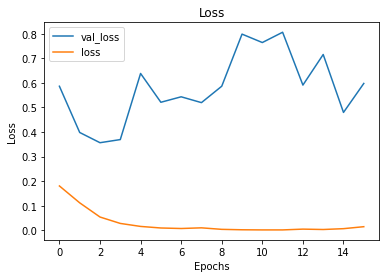

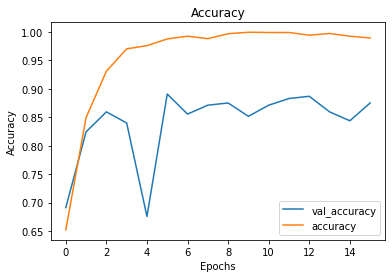

In [191]:
visualize_training_results(results_1)

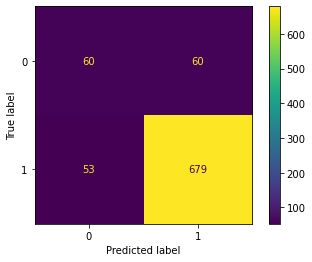

In [192]:
model_predictions(model_1)

In [193]:
model_2 = keras.models.Sequential()
model_2.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

model_2.add(layers.LSTM(32, kernel_regularizer=tf.keras.regularizers.L1(0.02), 
                        dropout=0.5))
model_2.add(layers.Dense(1, activation="tanh"))

In [194]:
loss_2 = keras.losses.BinaryCrossentropy(from_logits=False)
optim_2 = tf.keras.optimizers.Adam(lr=0.0001) 
metrics_2 = ["accuracy"]

model_2.compile(loss = loss_2, optimizer = optim_2, metrics = metrics_2)

# Modeling with Balanced Data
results_2 = model_2.fit(X_train_padded, y_train, 
                        epochs=30, class_weight={0: w0, 1: w1}, 
                          validation_split=0.15, batch_size=20, callbacks=[callback], verbose=1)

Epoch 1/30
109/109 [==============================] - 1s 9ms/step - loss: 7.8863 - accuracy: 0.1659 - val_loss: 8.9722 - val_accuracy: 0.1671
Epoch 2/30
109/109 [==============================] - 1s 6ms/step - loss: 6.9003 - accuracy: 0.1659 - val_loss: 7.5339 - val_accuracy: 0.1671
Epoch 3/30
109/109 [==============================] - 1s 6ms/step - loss: 6.0373 - accuracy: 0.1894 - val_loss: 6.1835 - val_accuracy: 0.3316
Epoch 4/30
109/109 [==============================] - 1s 6ms/step - loss: 5.2771 - accuracy: 0.5581 - val_loss: 5.4387 - val_accuracy: 0.3812
Epoch 5/30
109/109 [==============================] - 1s 6ms/step - loss: 4.5889 - accuracy: 0.5705 - val_loss: 4.7559 - val_accuracy: 0.5431
Epoch 6/30
109/109 [==============================] - 1s 7ms/step - loss: 3.9523 - accuracy: 0.7111 - val_loss: 4.1458 - val_accuracy: 0.5666
Epoch 7/30
109/109 [==============================] - 1s 6ms/step - loss: 3.3642 - accuracy: 0.6498 - val_loss: 3.5255 - val_accuracy: 0.8564
Epoch 

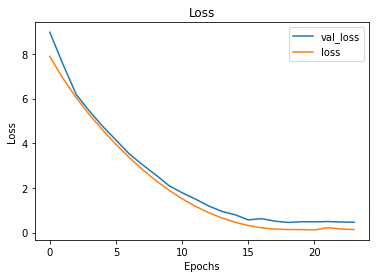

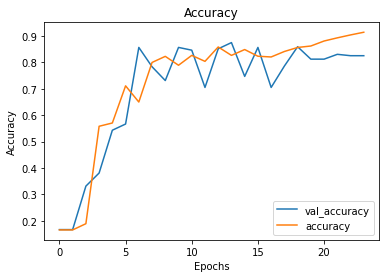

In [195]:
visualize_training_results(results_2)

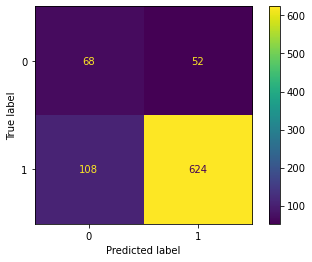

In [196]:
model_predictions(model_2)